In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('../data/raw/apartments_for_rent_classified_100K.csv', delimiter=';',encoding="ISO-8859-1")
data.head()

/tmp/ipykernel_148499/3036304678.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../data/raw/apartments_for_rent_classified_100K.csv', delimiter=';',encoding="ISO-8859-1")


,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1.0,1.0,USD,No,Thumbnail,Cats,2195.0,"$2,195",Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1577360355
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3.0,USD,No,Thumbnail,"Cats,Dogs",1250.0,"$1,250",Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1577360340
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2.0,3.0,USD,No,Thumbnail,NaN,1395.0,"$1,395",Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1577360332
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1.0,2.0,USD,No,Thumbnail,"Cats,Dogs",1600.0,"$1,600",Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1577360330
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1.0,1.0,USD,No,Thumbnail,"Cats,Dogs",975.0,$975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1577360308


# Exploration


In [3]:
data.describe()

,id,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
count,9.949200e+04,99429.000000,99368.000000,99491.000000,99492.000000,99467.000000,99467.000000,9.949200e+04
mean,5.358321e+09,1.445323,1.728212,1527.057281,956.430688,36.947988,-91.568656,1.559665e+09
std,1.847404e+08,0.547021,0.749200,904.245882,417.571522,4.599461,15.817168,1.105077e+07
min,5.121046e+09,1.000000,0.000000,100.000000,101.000000,19.573800,-159.369800,1.544174e+09
25%,5.197950e+09,1.000000,1.000000,1013.000000,729.000000,33.746500,-104.791900,1.550832e+09
50%,5.508673e+09,1.000000,2.000000,1350.000000,900.000000,37.228200,-84.562300,1.568745e+09
75%,5.509007e+09,2.000000,2.000000,1795.000000,1115.000000,39.953000,-77.608200,1.568767e+09
max,5.669439e+09,9.000000,9.000000,52500.000000,50000.000000,64.833200,-68.778800,1.577391e+09


## Type check

In [4]:
data.dtypes

id                 int64
category          object
title             object
body              object
amenities         object
bathrooms        float64
bedrooms         float64
currency          object
fee               object
has_photo         object
pets_allowed      object
price            float64
price_display     object
price_type        object
square_feet        int64
address           object
cityname          object
state             object
latitude         float64
longitude        float64
source            object
time               int64
dtype: object

# Price currency types

<Axes: >

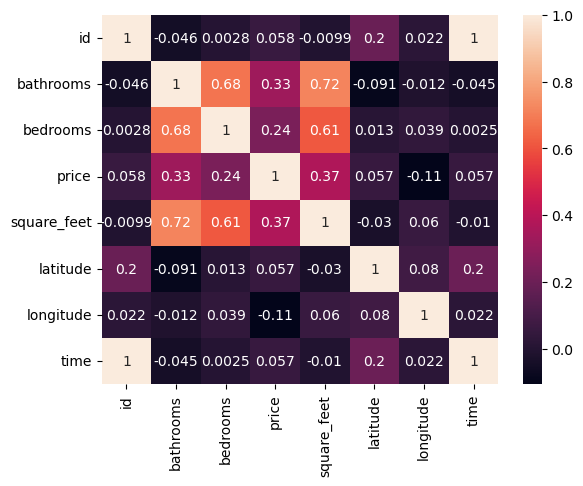

In [5]:
import seaborn as sns
sns.heatmap(data.corr(numeric_only=True), annot=True)

## Data transform

In [6]:
import statsmodels.api as sm

In [7]:
features = data[['bathrooms','bedrooms','square_feet']]
target = data['price']

In [8]:
data_to_regressor= sm.add_constant(features,prepend=False)
data_to_regressor

,bathrooms,bedrooms,square_feet,const
0,1.0,1.0,542,1.0
1,1.5,3.0,1500,1.0
2,2.0,3.0,1650,1.0
3,1.0,2.0,820,1.0
4,1.0,1.0,624,1.0
...,...,...,...,...
99487,1.0,1.0,605,1.0
99488,2.0,2.0,921,1.0
99489,1.0,1.0,650,1.0
99490,1.0,1.0,701,1.0


In [9]:
target.fillna(0, inplace=True)
data_to_regressor.fillna(0, inplace=True)

In [10]:
mod = sm.OLS(target, data_to_regressor)

In [11]:
res = mod.fit()

In [12]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     6145.
Date:                Tue, 07 Nov 2023   Prob (F-statistic):               0.00
Time:                        18:02:41   Log-Likelihood:            -8.0997e+05
No. Observations:               99492   AIC:                         1.620e+06
Df Residuals:                   99488   BIC:                         1.620e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
bathrooms     321.9826      6.987     46.083      0.000     308.288     335.677
bedrooms      -94.3697      5.060    -18.650      0.000    -104.287     -84.452
square_feet     0.6470      0.009     75.880      0.000       0.630       0.664
const         606.0815      7.829     77.417      0.000     590.737     621.426
==============================================================================
Omnibus:                   149529.766   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        452682047.307
Skew:                           8.565   Prob(JB):                         0.00
Kurtosis:                     333.008   Cond. No.                     3.49e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Treinando um modelo


In [13]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

## Train pipeline

In [14]:
data.isna().sum()
data['pets_allowed'].fillna('not_specified', inplace=True)
data['cityname'].fillna('not_specified', inplace=True)
data['state'].fillna('not_specified', inplace=True)
data['amenities'].fillna('not_specified', inplace=True)
data['bedrooms'] = data['bedrooms'].fillna(data['bedrooms'].mode().iloc[0])
data['bathrooms'] = data['bathrooms'].fillna(data['bathrooms'].mode().iloc[0])


In [15]:
cat_pipline = OneHotEncoder(handle_unknown='ignore')
numerical_pipeline = StandardScaler()
categorical_columns = ["currency","fee","pets_allowed","category","cityname","price_type","state"]
numerical_columns = ["bathrooms","bedrooms","square_feet"]
column_transform = ColumnTransformer([('categorical_pipeline', cat_pipline, categorical_columns ), ('numerical_pipeline', numerical_pipeline, numerical_columns)])

In [16]:
train_pipeline = Pipeline([('column_transform', column_transform), ('regressor', RandomForestRegressor())])

## Spliting data


In [17]:
from sklearn.model_selection import train_test_split

X = data[["currency","fee","pets_allowed","category","cityname","price_type","state","bathrooms","bedrooms","square_feet"]]
target = data["price"].copy()

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [18]:
train_pipeline.fit(X_train, y_train)

Pipeline(steps=[('column_transform',
                 ColumnTransformer(transformers=[('categorical_pipeline',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['currency', 'fee',
                                                   'pets_allowed', 'category',
                                                   'cityname', 'price_type',
                                                   'state']),
                                                 ('numerical_pipeline',
                                                  StandardScaler(),
                                                  ['bathrooms', 'bedrooms',
                                                   'square_feet'])])),
                ('regressor', RandomForestRegressor())])

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

y_pred = train_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("MSE: ", mse)
print("MAE: ", mae)
print("R2: ", r2)
print("MAPE: ", mape)

MSE:  248314.08062825826
MAE:  205.3673422487534
R2:  0.7050861450750334
MAPE:  0.13363919851965456


# Saving the model

In [25]:
import pickle
pickle.dump(train_pipeline, open('../model/model.sav', 'wb'))

In [27]:
model = pickle.load(open('../model/model.sav','rb'))
model

Pipeline(steps=[('column_transform',
                 ColumnTransformer(transformers=[('categorical_pipeline',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['currency', 'fee',
                                                   'pets_allowed', 'category',
                                                   'cityname', 'price_type',
                                                   'state']),
                                                 ('numerical_pipeline',
                                                  StandardScaler(),
                                                  ['bathrooms', 'bedrooms',
                                                   'square_feet'])])),
                ('regressor', RandomForestRegressor())])